In [96]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv("Mushroom_project.csv")
df

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [30]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [31]:
df.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

In [33]:
for col in df.columns:
    df[col] = lbl.fit_transform(df[col])

In [34]:
df

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [35]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [36]:
df.nunique()

cap-shape                    2
cap-surface                  6
cap-color                    4
bruises%3F                  10
odor                         2
gill-attachment              9
gill-spacing                 2
gill-size                    2
gill-color                   2
stalk-shape                 12
stalk-root                   2
stalk-surface-above-ring     5
stalk-surface-below-ring     4
stalk-color-above-ring       4
stalk-color-below-ring       9
veil-type                    9
veil-color                   1
ring-number                  4
ring-type                    3
spore-print-color            5
population                   9
habitat                      6
class                        7
dtype: int64

veil colour is showing one element we can drop it 

In [37]:
df.drop("veil-color",axis=1 ,inplace=True)

In [38]:
df

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,ring-number,ring-type,spore-print-color,population,habitat,class
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [39]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [40]:
#median is greater than mean for cap surface,odor,gill attachment,gill colour etc,that means they are left skewed datas
#there is some difference between 75% and maximum for odor,gill color,habitat etc..so there are chances for presence of outliers

In [41]:
df.skew()

cap-shape                   0.071946
cap-surface                -0.247052
cap-color                  -0.590859
bruises%3F                  0.706965
odor                        0.342750
gill-attachment            -0.080790
gill-spacing               -5.977076
gill-size                   1.840088
gill-color                  0.825797
stalk-shape                 0.061410
stalk-root                 -0.271345
stalk-surface-above-ring    0.947852
stalk-surface-below-ring   -1.098739
stalk-color-above-ring     -0.757703
stalk-color-below-ring     -1.835434
veil-type                  -1.791593
ring-number                -6.946944
ring-type                   2.701657
spore-print-color          -0.290018
population                  0.548426
habitat                    -1.413096
class                       0.985548
dtype: float64

In [42]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [43]:
df.shape

(8124, 22)

cap-shape                      AxesSubplot(0.125,0.536818;0.0596154x0.343182)
cap-surface                 AxesSubplot(0.196538,0.536818;0.0596154x0.343182)
cap-color                   AxesSubplot(0.268077,0.536818;0.0596154x0.343182)
bruises%3F                  AxesSubplot(0.339615,0.536818;0.0596154x0.343182)
odor                        AxesSubplot(0.411154,0.536818;0.0596154x0.343182)
gill-attachment             AxesSubplot(0.482692,0.536818;0.0596154x0.343182)
gill-spacing                AxesSubplot(0.554231,0.536818;0.0596154x0.343182)
gill-size                   AxesSubplot(0.625769,0.536818;0.0596154x0.343182)
gill-color                  AxesSubplot(0.697308,0.536818;0.0596154x0.343182)
stalk-shape                 AxesSubplot(0.768846,0.536818;0.0596154x0.343182)
stalk-root                  AxesSubplot(0.840385,0.536818;0.0596154x0.343182)
stalk-surface-above-ring          AxesSubplot(0.125,0.125;0.0596154x0.343182)
stalk-surface-below-ring       AxesSubplot(0.196538,0.125;0.0596

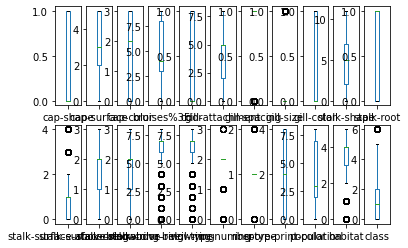

In [61]:
df.plot(kind="box", subplots=True, layout=(2,11))

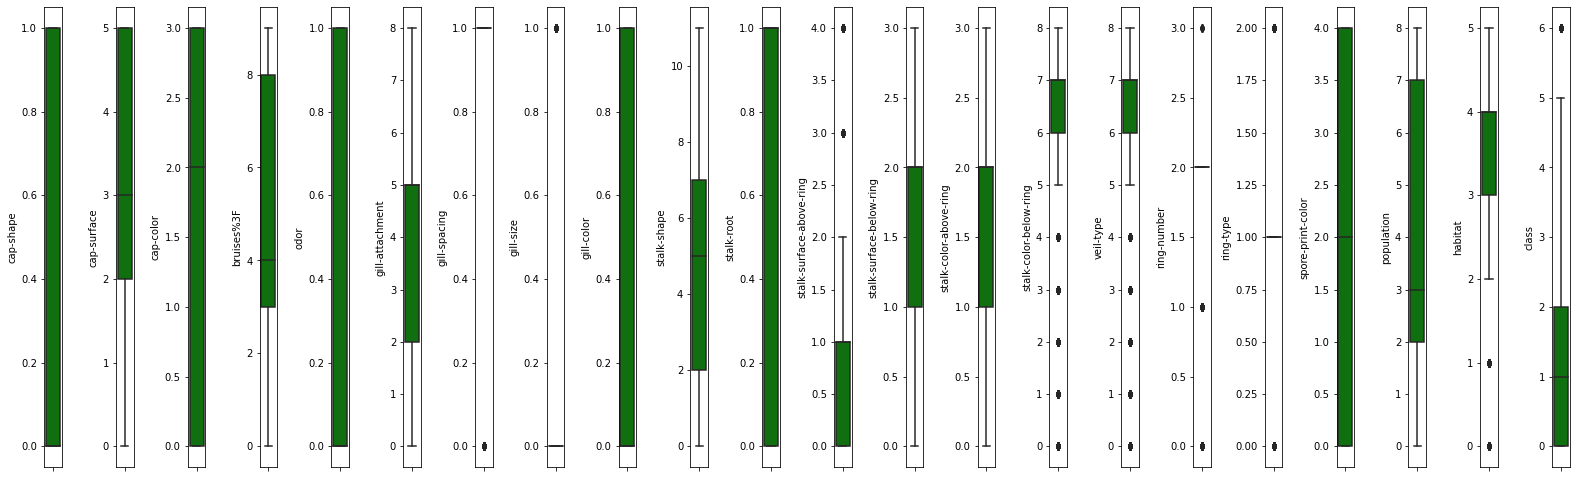

In [76]:
collist=df.columns.values
ncol=22
nrows=10
plt.figure(figsize=(ncol,3*ncol))
for i in range(0, len(collist)):
    plt.subplot(nrows,ncol, i+1)
    sns.boxplot(df[collist[i]],color="green",orient='v')
    plt.tight_layout()

In [68]:
df.corr()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,ring-number,ring-type,spore-print-color,population,habitat,class
cap-shape,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-surface,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-color,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
bruises%3F,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
odor,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
gill-attachment,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-spacing,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-size,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-color,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
stalk-shape,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


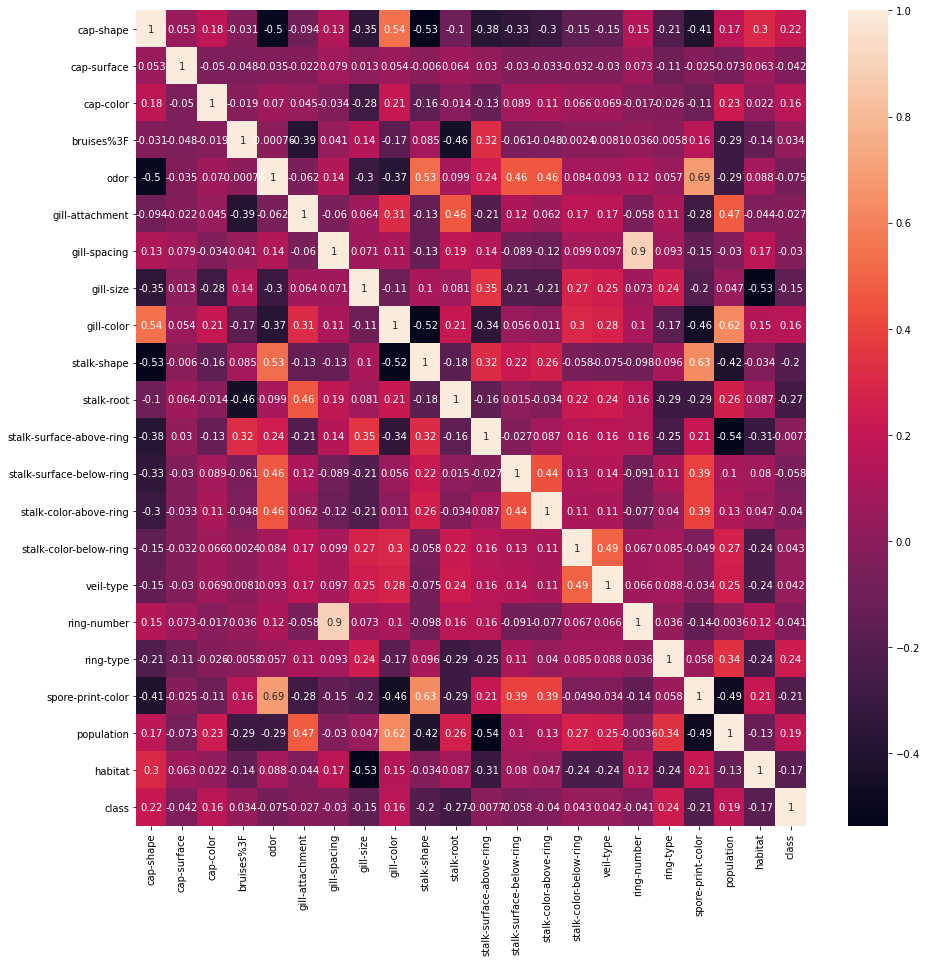

In [71]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

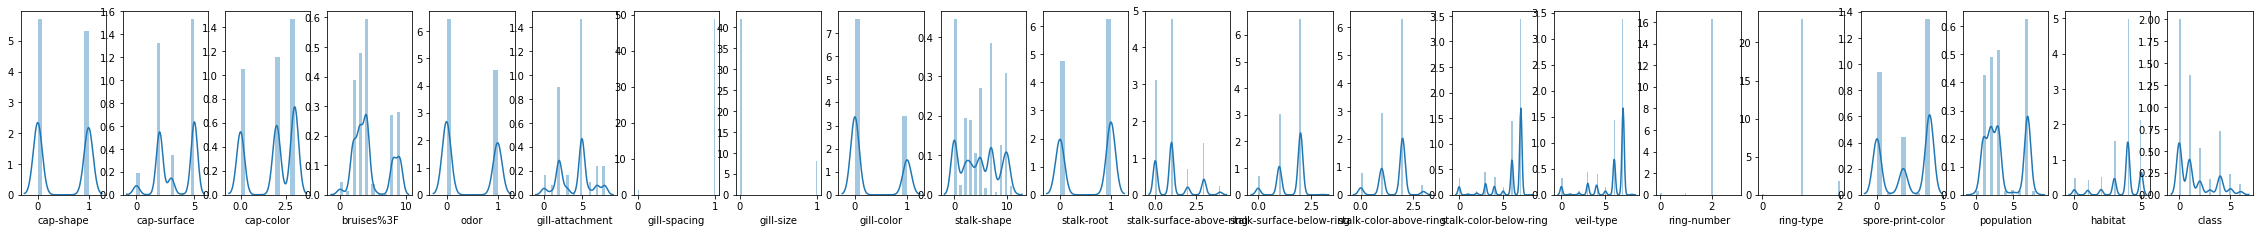

In [73]:
plt.figure(figsize=(40,40))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

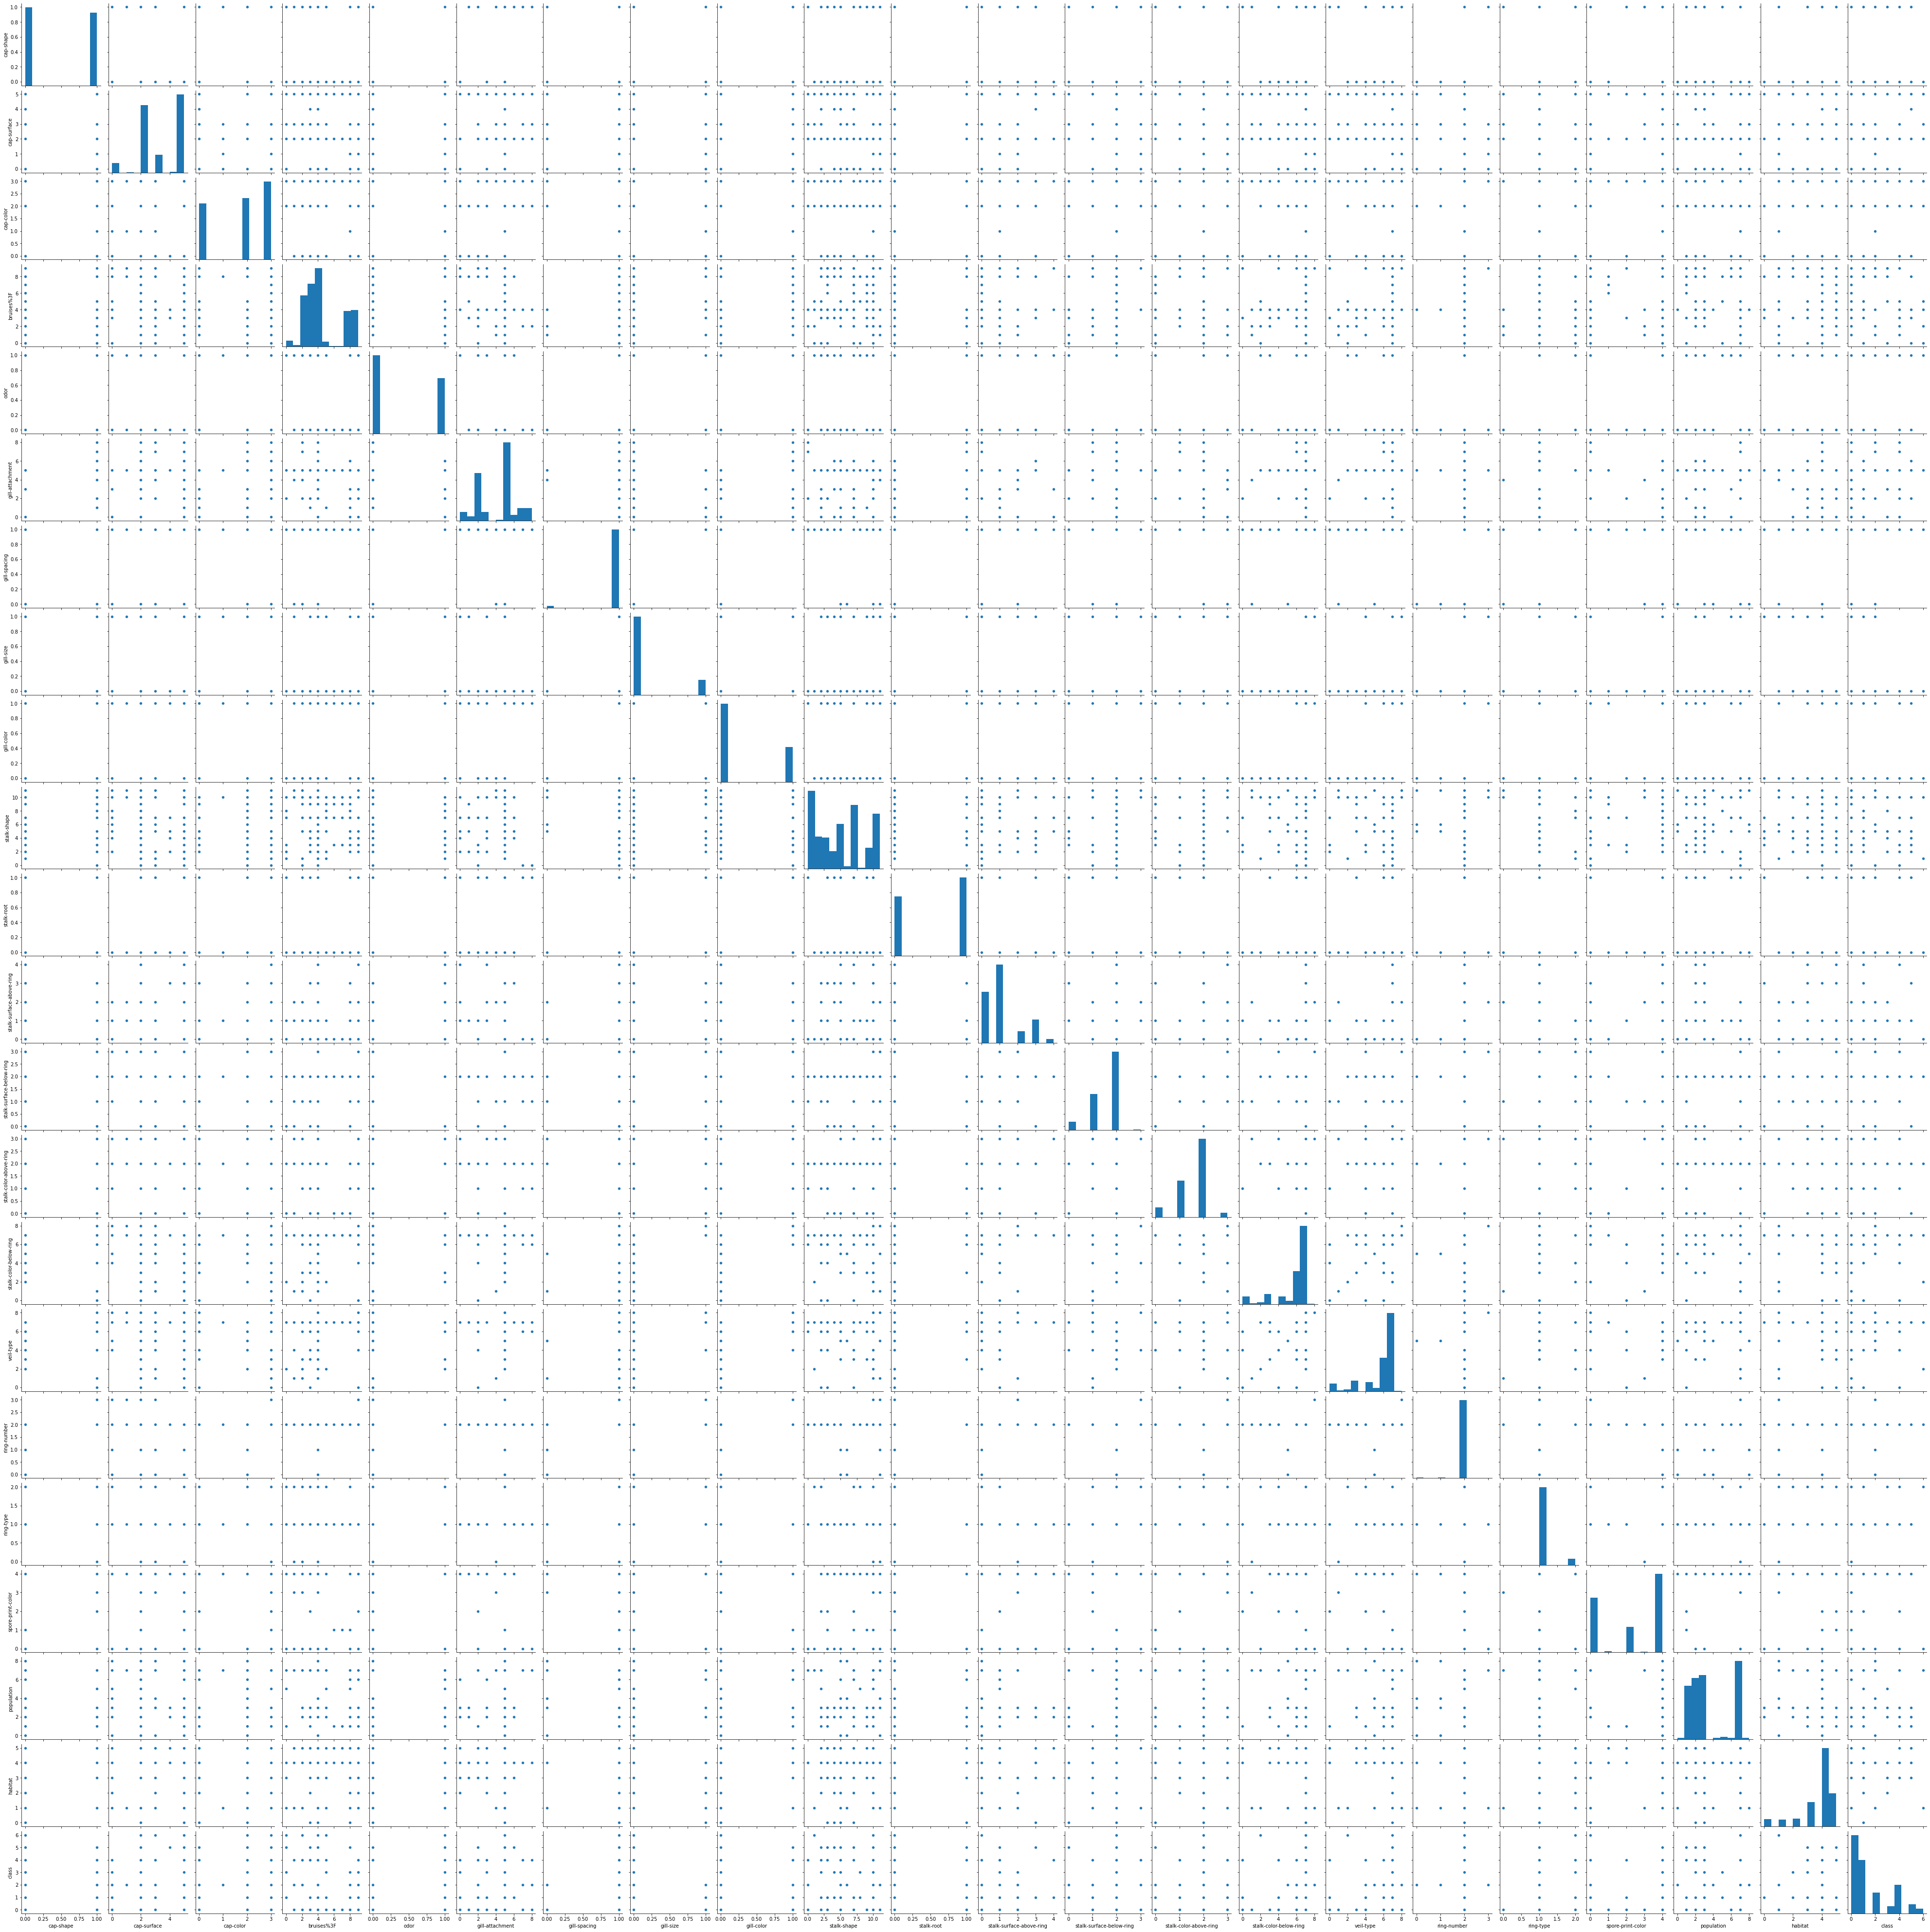

In [74]:
sns.pairplot(df)

In [82]:
z=np.abs(zscore(df))
z


array([[1.0366127 , 1.02971224, 0.14012794, ..., 0.67019486, 0.5143892 ,
        2.03002809],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.29572966],
       [0.96468045, 2.08704716, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.86714922],
       ...,
       [0.96468045, 0.8403434 , 0.14012794, ..., 1.50964337, 2.11182722,
        0.28570978],
       [1.0366127 , 0.21699152, 0.95327039, ..., 1.42842641, 0.28432981,
        0.28570978],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.16925365, 2.11182722,
        0.28570978]])

In [83]:
threshold=3
print(np.where(z>3))

(array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64), array([15, 14, 15, ..., 16,  6, 16], dtype=int64))


In [84]:
z[1816][15]

3.0383605317184252

In [85]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(8124, 22)
(6568, 22)


In [87]:
x=df.iloc[:,0:-1]
x

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,3,2,2,7,7,2,1,4,2,3
1,0,5,2,9,1,0,1,0,0,4,...,2,2,2,7,7,2,1,4,3,2
2,0,0,2,8,1,3,1,0,0,5,...,2,2,2,7,7,2,1,4,3,2
3,1,5,3,8,1,6,1,0,1,5,...,3,2,2,7,7,2,1,4,2,3
4,0,5,2,3,0,5,1,1,0,4,...,3,2,2,7,7,2,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,0,2,2,5,5,1,1,4,0,1
8120,0,5,2,4,0,5,0,0,0,11,...,0,2,2,5,5,0,1,4,0,4
8121,0,2,2,4,0,5,0,0,0,5,...,0,2,2,5,5,1,1,4,0,1
8122,1,3,3,4,0,8,1,0,1,0,...,0,2,1,7,7,2,1,0,7,4


In [88]:
y=df.iloc[:,-1]
y

0       5
1       1
2       3
3       5
4       1
       ..
8119    2
8120    2
8121    2
8122    2
8123    2
Name: class, Length: 8124, dtype: int32

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [90]:
lr=LogisticRegression()

In [91]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.6403803131991052
[[521  51  73   0  49   0   0]
 [ 28 351   0  25  33  37   0]
 [ 36   1 112   0  22   0   0]
 [  0  39   0  23   0   0   0]
 [ 80  68  58   3  51   0   0]
 [  8  32   0   0   0  57   0]
 [  0   0   0   0   0   0  30]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       694
           1       0.65      0.74      0.69       474
           2       0.46      0.65      0.54       171
           3       0.45      0.37      0.41        62
           4       0.33      0.20      0.25       260
           5       0.61      0.59      0.60        97
           6       1.00      1.00      1.00        30

    accuracy                           0.64      1788
   macro avg       0.61      0.61      0.61      1788
weighted avg       0.63      0.64      0.63      1788



In [92]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.5413870246085011
[[274  53   0   0 306  61   0]
 [  0 229   0  62  92  91   0]
 [  0  13  50   0 108   0   0]
 [  0   0   0  62   0   0   0]
 [  0   2   0   8 226  24   0]
 [  0   0   0   0   0  97   0]
 [  0   0   0   0   0   0  30]]
              precision    recall  f1-score   support

           0       1.00      0.39      0.57       694
           1       0.77      0.48      0.59       474
           2       1.00      0.29      0.45       171
           3       0.47      1.00      0.64        62
           4       0.31      0.87      0.46       260
           5       0.36      1.00      0.52        97
           6       1.00      1.00      1.00        30

    accuracy                           0.54      1788
   macro avg       0.70      0.72      0.60      1788
weighted avg       0.79      0.54      0.55      1788



In [98]:
print("mean Absolute error: ",mean_absolute_error(y_test,pred))
print("mean squared error: ", mean_squared_error(y_test,pred))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred)))

mean Absolute error:  0.9642058165548099
mean squared error:  3.004474272930649
Root mean squared error:  1.7333419376829977


In [101]:
import pickle
filename="Mushroom project"
pickle.dump(lr,open(filename,"wb"))